FEUILLE DE TP 10

# Introduction aux schémas numériques pour f(x) = 0

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

## Exercice 1 : Méthode de  dichotomie

Pour cet exercice on fera les tests avec les fonctions suivantes sur l'intervalle $[-1,2]$ :
$$
\begin{gathered}
f_0(x) = e^x - 1 - \frac{x}{2} - \frac{x^2}{2},\\
f_1(x) = e^x - 1 - x,\\
f_2(x) = e^x - 1 - x - \frac{x^2}{2}.
\end{gathered}
$$

**Question 1**

> 1. Commencez par implémenter ces 3 fonctions.
> 2. Tracez les afin de vérifier qu'elles possèdent bien un unique 0 dans l'intervalle $[-1,2]$.

In [167]:
f = [lambda x: np.exp(x) - 1 - x/2 - x**2 / 2,
    lambda x: np.exp(x) - 1 - x,
    lambda x: np.exp(x) - 1 - x - x**2 / 2,
    ]

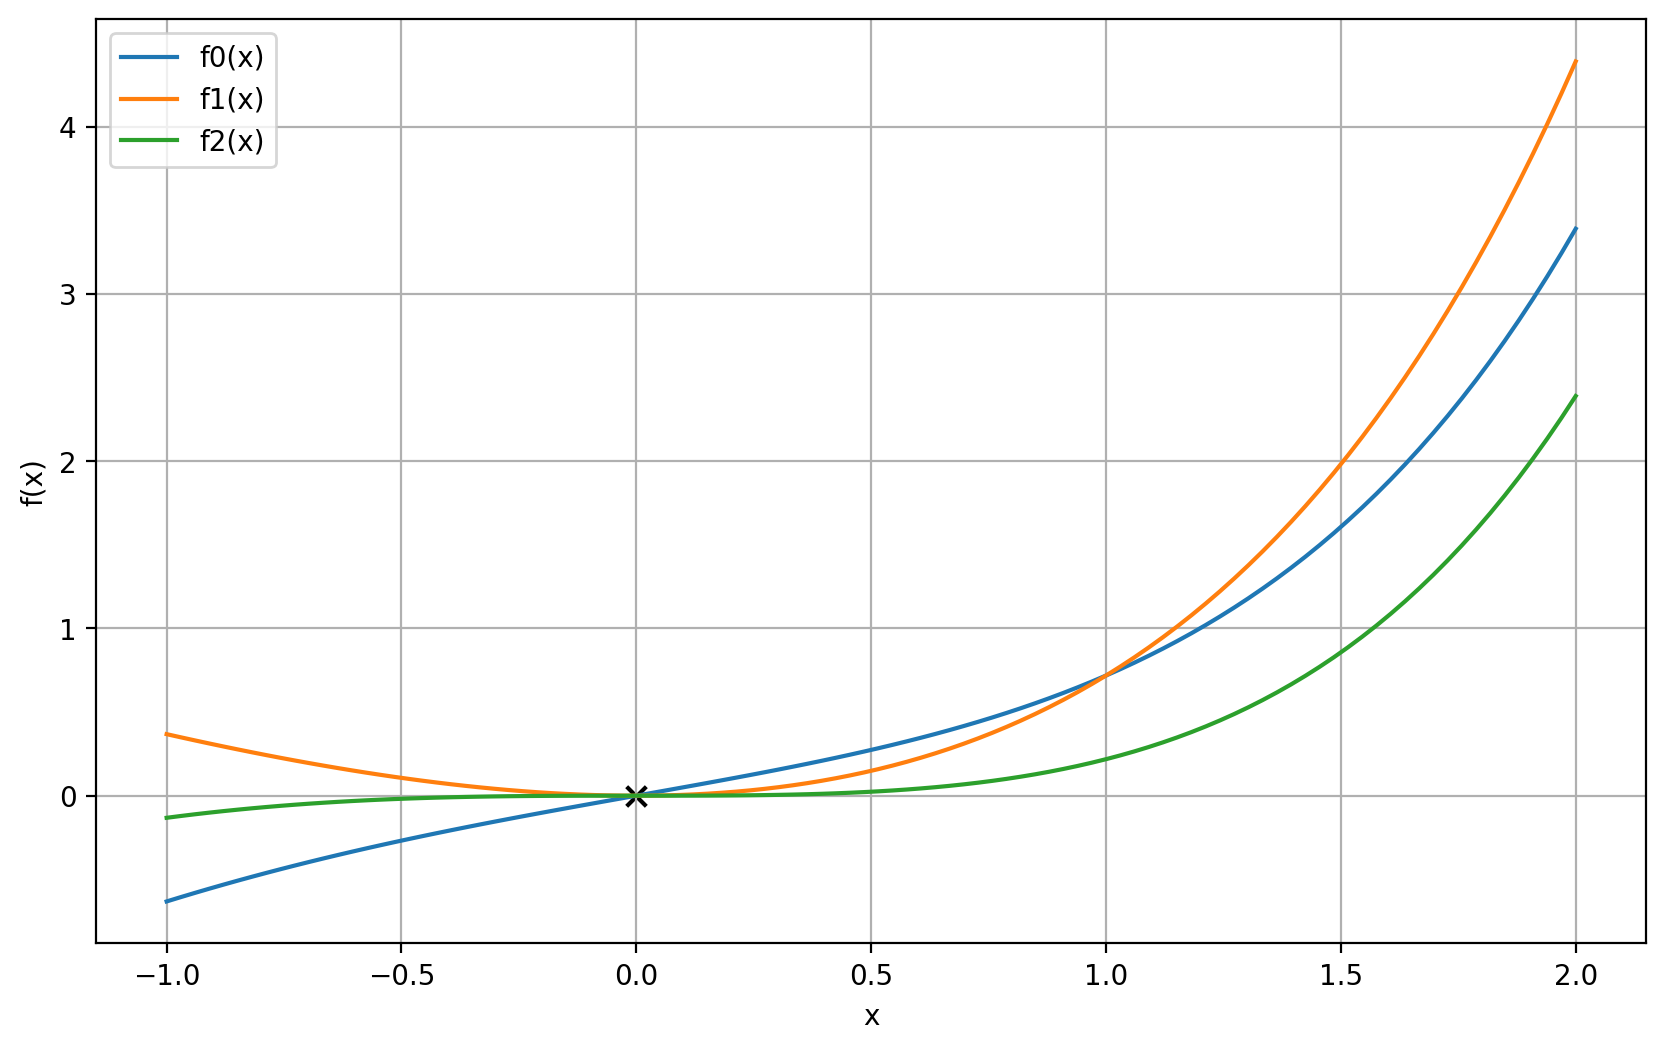

In [168]:
xx = np.linspace(-1,2,100)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)

for i,fi in enumerate(f):
    ax.plot(xx,fi(xx), label = f'f{i}(x)')
    
ax.scatter(0,0, color='black',s = 50,marker = 'x')
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel(f'f(x)')
ax.legend()

**Question 2**

> Implémentez la méthode de Dichotomie à travers une fonction `x, niter, aL, bL, cL = dichotomie(f, a, b, tol, itermax)` qui prend en arguments
>  * la fonction $f$ dont on cherche la racine, 
>  * l'intervalle $[a, b]$ avec $f(a) f(b) < 0$, 
>  * le paramètre $tol$ du test d'arrêt : on arrête si $|f(x)| < tol$
>  * et le nombre $iterMax$ maximum d'itérations autorisées.
>
> et qui retourne : 
> * $x$ la solution approchée, 
> * $niter$ le nombre d'itérations réalisées, 
> * $aL$, $bL$ et $cL$ des `ndarray` contenant les termes des suites $(a_n)$, $(b_n)$ et $(c_n)$.

In [180]:
def dichotomie(f, a, b, tol=1e-6, itermax=500):
    """
    Approximation du zeros d'une fonction f passée en argument

    Parameters
    ----------

    f: function
        la fonction
    a: float
        bord gauche de l'intervalle
    b: float
        bord droit de l'intervalle
    tol: float (default 1.e-6)
        paramètre du test d'arrêt : arrêt si |f(x)| < tol ou si longueur de l'intervalle < tol
    itermax: int (default 1000)
        nombre maximal d'itération
        
    Returns
    -------
    
    x: float
        la solution approchée trouvée
    niter: int
        le nombre d'itérations
    an: ndarray
        les valeurs de la suite an
    bn: ndarray
    """
    if f(a)*f(b) >= 0 :
        return ValueError('f(a)f(b) est supérieur à 0')
    
    else:
        niter = 0
        x = 0
        c = (a + b) / 2
        aL,bL,cL = [a],[b],[c]
        while (np.abs(f(cL[-1])) > tol) or (niter < itermax):
            if f(aL[-1])*f(cL[-1]) < 0 :
                aL.append(aL[-1])
                bL.append(cL[-1])
                cL.append((aL[-1] + bL[-1]) / 2)
                niter += 1
            
            elif f(aL[-1])*f(cL[-1]) > 0:
                aL.append(cL[-1])
                bL.append(bL[-1])
                cL.append((aL[-1] + bL[-1]) / 2)
                niter += 1
            
            elif f(aL[-1])*f(cL[-1]) == 0:
                x = cL[-1]
        
        return x,niter,np.array(aL),np.array(bL),np.array(cL)

**Question 3**

> 1. Reprenez les graphiques de la question 1.
> 2. Calculez la solution approchée $x^\star$ donnée par la méthode de la dichotomie pour chacun des cas et représentez la à l'aide d'un `scatter` sur la figure.
> 3. Sur une autre figure, tracez pour chaque fonction (sauf $f_1$ évidemment) les 3 nuages de points $(|a_n|, |a_{n+1}|)$, $(|b_n|, |b_{n+1}|)$ et $(|c_n|, |c_{n+1}|)$. Vous pouvez utiliser une échelle logarithmique ! Les courbes sont-elles cohérentes avec la théorie ? Quelle est l'ordre de la méthode ?

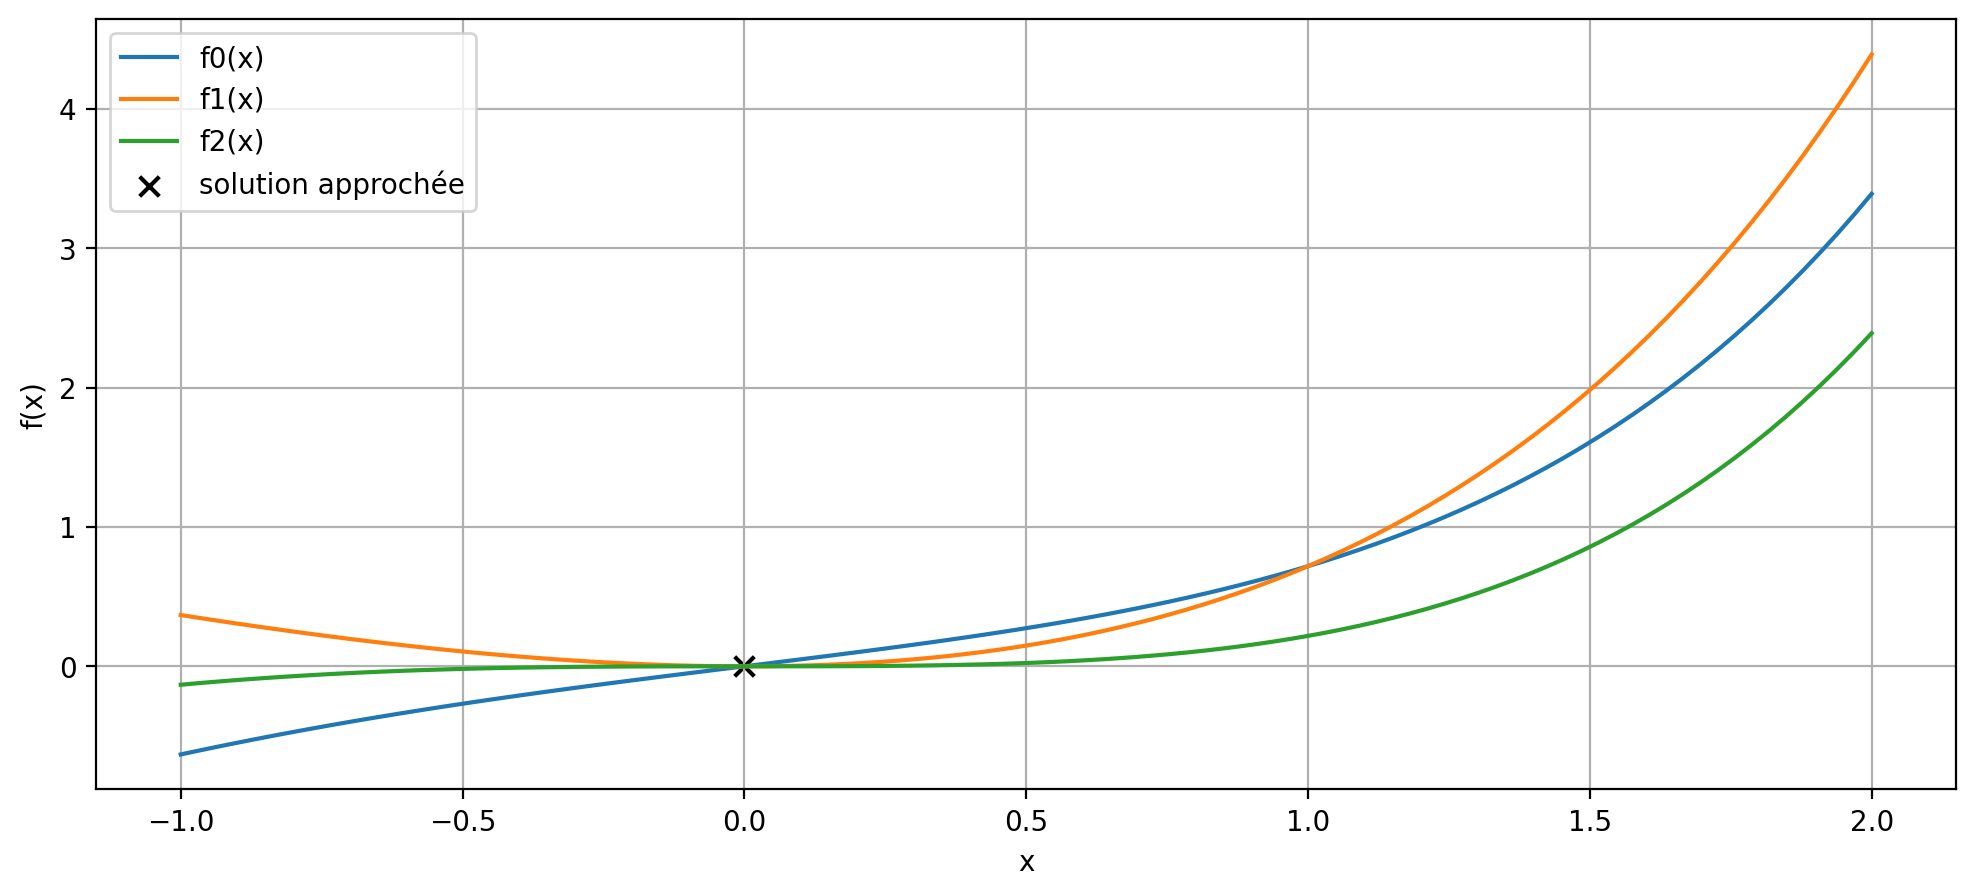

In [170]:
xx = np.linspace(-1,2,100)
a,b = -1,2

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,1,1)
for i,fi in enumerate(f):
    ax.plot(xx,fi(xx), label = f'f{i}(x)')

x_etoile,niter,aL,bL,cL = dichotomie(f[0], a, b, tol=1e-6, itermax=500)

ax.scatter(x_etoile,f[0](x_etoile) ,marker = 'x', color = 'black',s = 50,label = 'solution approchée')   
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel(f'f(x)')
ax.legend()

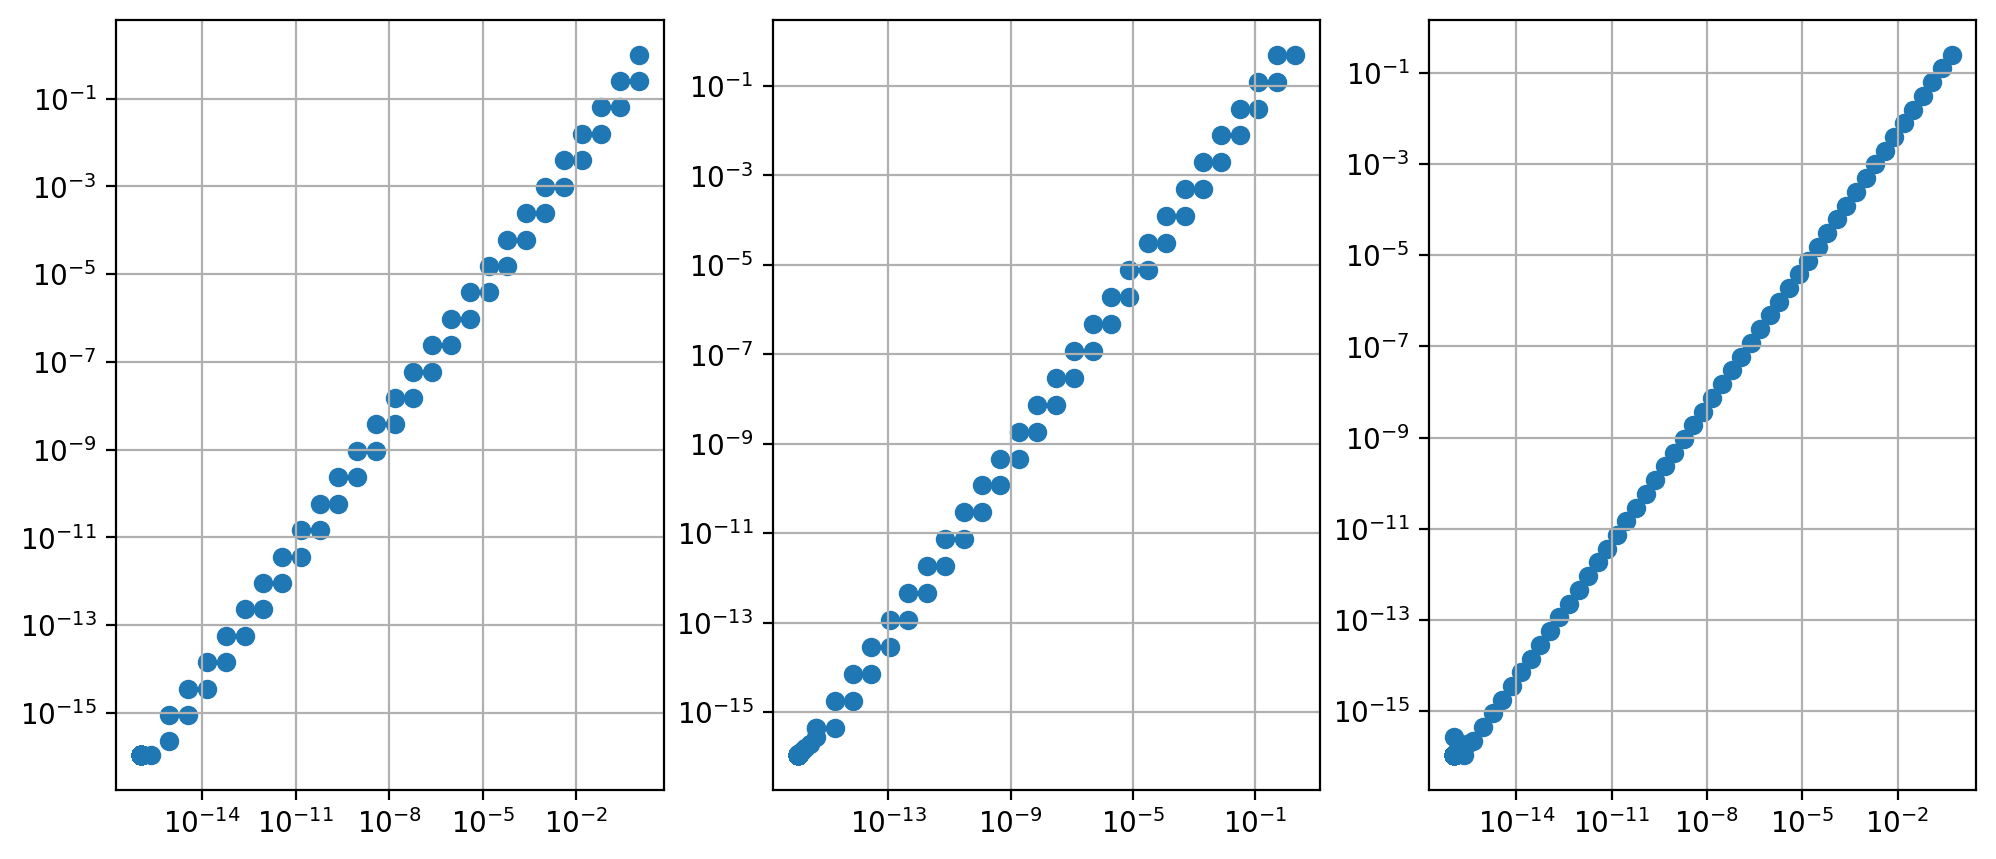

In [173]:
fig = plt.figure(figsize = (12,5))
bx = fig.subplots(1,3)

x_etoile,niter,aL,bL,cL = dichotomie(f[0], a, b, tol=1e-6, itermax=500)

bx[0].scatter(np.abs(aL[:-1]),np.abs(aL[1:]))
bx[0].set_xscale('log')
bx[0].set_yscale('log')
bx[0].grid()

bx[1].scatter(np.abs(bL[:-1]),np.abs(bL[1:]))
bx[1].set_xscale('log')
bx[1].set_yscale('log')
bx[1].grid()

bx[2].scatter(np.abs(cL[:-1]),np.abs(cL[1:]))
bx[2].set_xscale('log')
bx[2].set_yscale('log')
bx[2].grid()


## Exercice 2 : Méthode de fausse position

Pour cet exercice on fera les tests avec les fonctions suivantes sur l'intervalle $[-1,1]$ :
$$
\begin{gathered}
f_0(x) = e^x - 1,\\
f_1(x) = e^{-x} - 1,\\
f_2(x) = 1 - e^x,\\
f_3(x) = 1 - e^{-x}.
\end{gathered}
$$

**Question 1**

> 1. Commencez par implémenter ces 4 fonctions.
> 2. Tracez les afin de vérifier qu'elles possèdent bien un unique 0 dans l'intervalle $[-1,1]$.

In [4]:
f = [lambda x: np.exp(x) - 1,
    lambda x: np.exp(-x) - 1,
    lambda x: 1 - np.exp(x),
    lambda x: 1 - np.exp(-x),
    ]

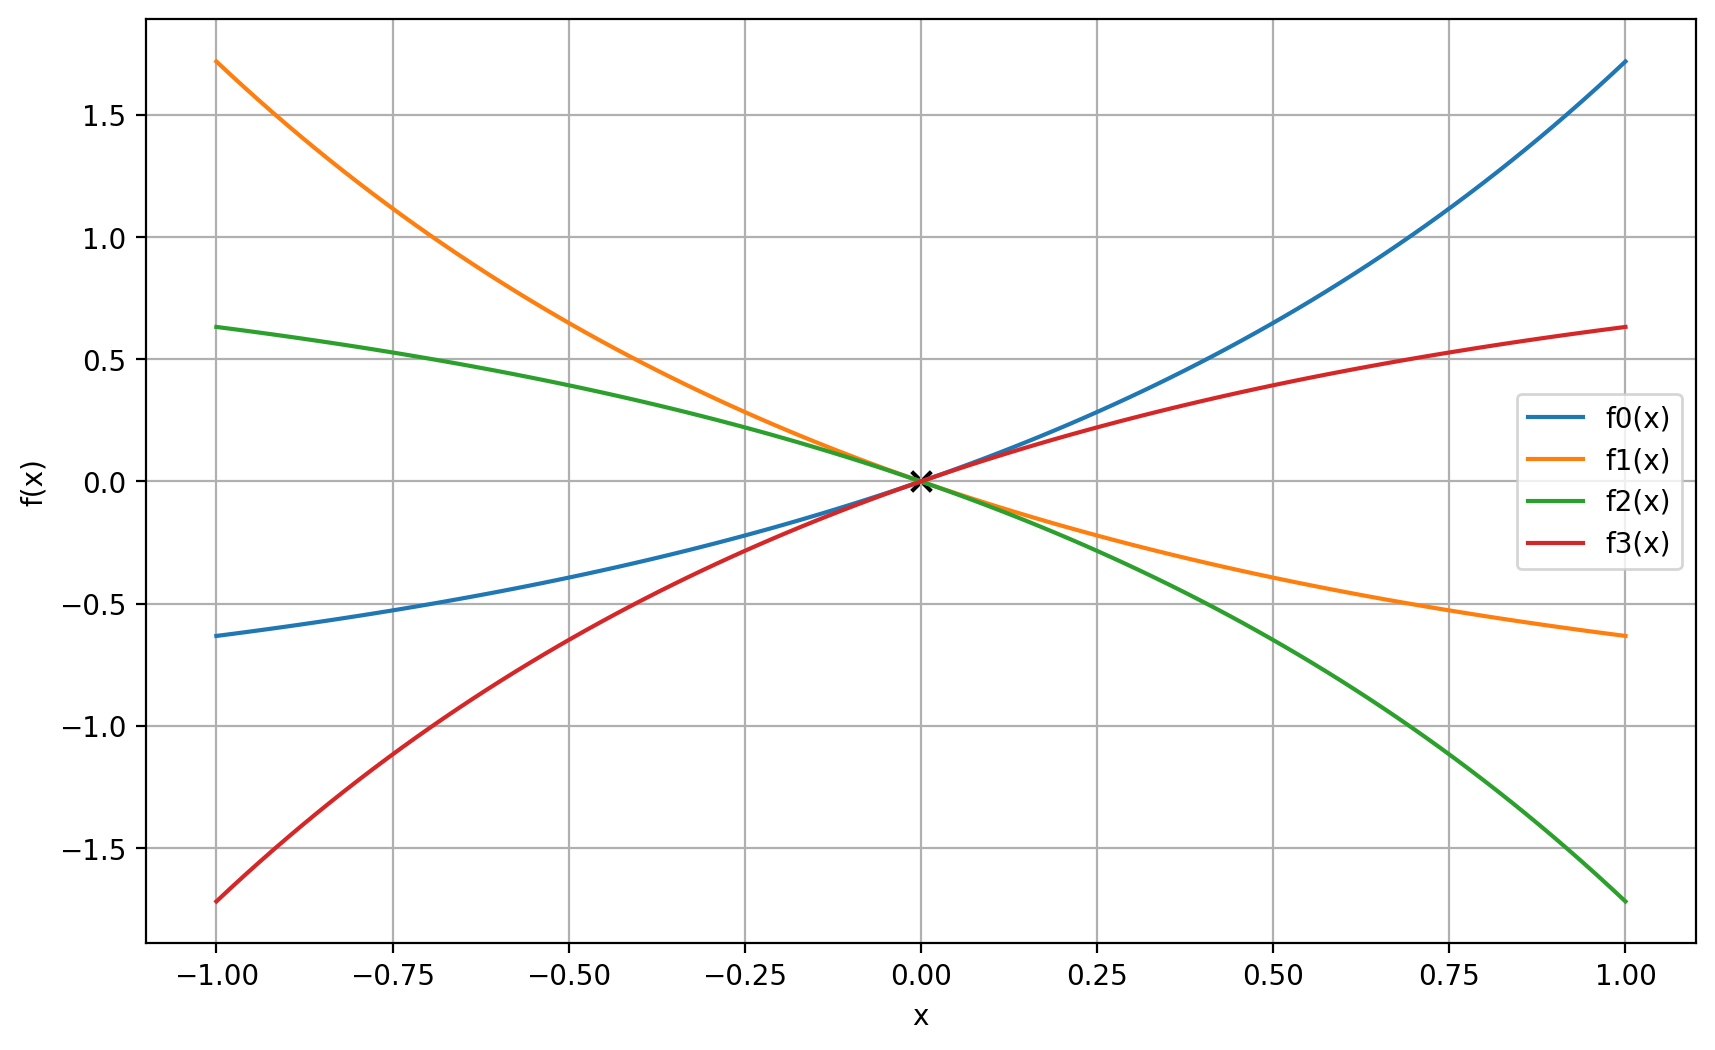

In [5]:
xx = np.linspace(-1,1,100)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)

for i,fi in enumerate(f):
    ax.plot(xx,fi(xx), label = f'f{i}(x)')
    
ax.scatter(0,0, color='black',s = 50,marker = 'x')
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel(f'f(x)')
ax.legend()

**Question 2**

> Implémentez la méthode de la fausse position à travers une fonction `x, niter, aL, bL, cL = fausse_position(f, a, b, tol, itermax)` qui prend en arguments
>  * la fonction $f$ dont on cherche la racine, 
>  * l'intervalle $[a, b]$ avec $f(a) f(b) < 0$, 
>  * le paramètre $tol$ du test d'arrêt : on arrête si $|f(x)| < tol$
>  * et le nombre $iterMax$ maximum d'itérations autorisées.
>
> et qui retourne : 
> * $x$ la solution approchée, 
> * $niter$ le nombre d'itérations réalisées, 
> * $aL$, $bL$ et $cL$ des `ndarray` contenant les termes des suites $(a_n)$, $(b_n)$ et $(c_n)$.

In [190]:
def fausse_position(f, a, b, tol=1e-6, itermax=500):
    """
    Approximation du zeros d'une fonction f passée en argument

    Parameters
    ----------

    f: function
        la fonction
    a: float
        bord gauche de l'intervalle
    b: float
        bord droit de l'intervalle
    tol: float (default 1.e-6)
        paramètre du test d'arrêt : arrêt si |f(x)| < tol
    itermax: int (default 1000)
        nombre maximal d'itération
        
    Returns
    -------
    
    x: float
        la solution approchée trouvée
    niter: int
        le nombre d'itérations
    an: ndarray
        les valeurs de la suite an
    bn: ndarray
    """
    if f(a)*f(b) >= 0 :
        return ValueError('f(a)f(b) est supérieur à 0')
    
    else:
        niter = 0
        x = 0
        c = b - ((b-a) / (f(b) - f(a))) * f(b)
        aL,bL,cL = [a],[b],[c]
        while (np.abs(f(cL[-1])) > tol) or (niter <= itermax):
            if f(aL[-1])*f(cL[-1]) < 0 :
                aL.append(aL[-1])
                bL.append(cL[-1])
                cL.append(bL[-1] - ((bL[-1] - aL[-1]) / (f(bL[-1]) - f(aL[-1]))) * f(bL[-1]))
                niter += 1
            
            elif f(aL[-1])*f(cL[-1]) > 0:
                aL.append(cL[-1])
                bL.append(bL[-1])
                cL.append(bL[-1] - ((bL[-1] - aL[-1]) / (f(bL[-1]) - f(aL[-1]))) * f(bL[-1]))
                niter += 1
            
            elif f(aL[-1])*f(cL[-1]) == 0:
                x = cL[-1]
        
        return x,niter,np.array(aL),np.array(bL),np.array(cL)
    

**Question 3**

> 1. Reprenez les graphiques de la question 1.
> 2. Calculez la solution approchée $x^\star$ donnée par la méthode de la fausse position pour chacun des cas et représentez la à l'aide d'un `scatter` sur la figure.
> 3. Sur une autre figure, tracez pour chaque fonction les 3 nuages de points $(|a_n|, |a_{n+1}|)$, $(|b_n|, |b_{n+1}|)$ et $(|c_n|, |c_{n+1}|)$. Vous pouvez utiliser une échelle logarithmique ! Les courbes sont-elles cohérentes avec la théorie ? Quelle est l'ordre de la méthode ?

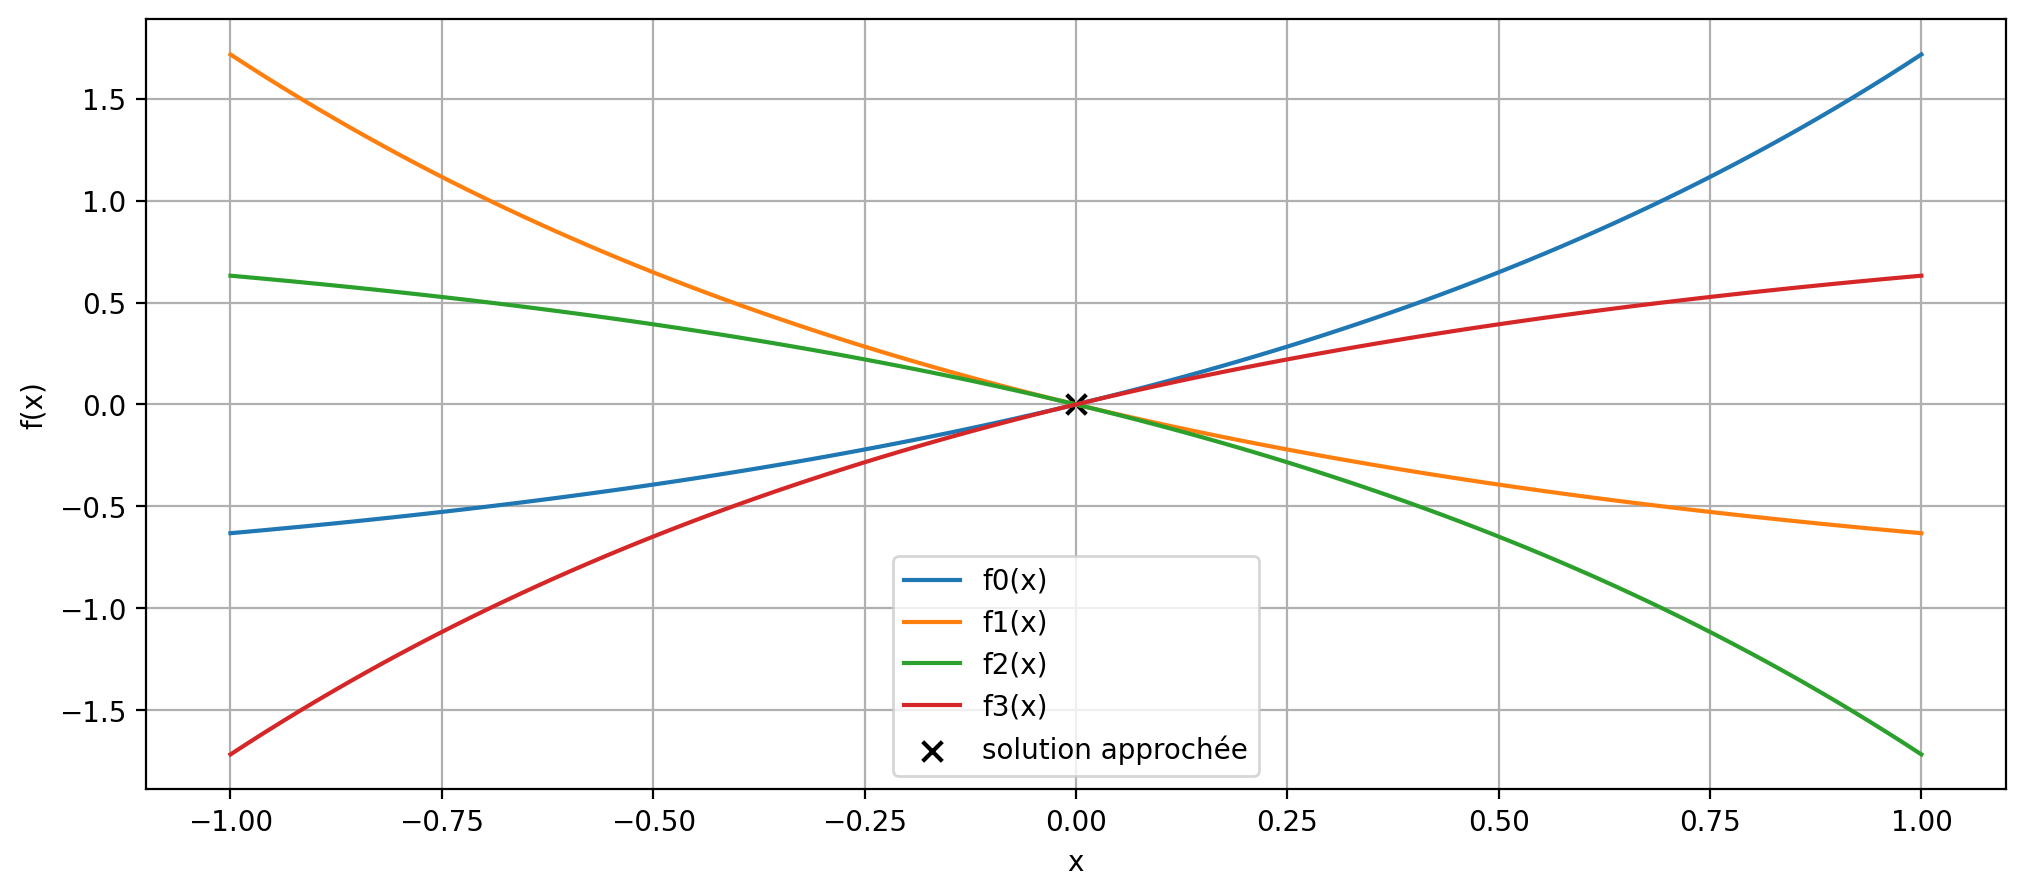

In [194]:
xx = np.linspace(-1,1,100)
a,b = -1,1

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,1,1)
for i,fi in enumerate(f):
    ax.plot(xx,fi(xx), label = f'f{i}(x)')

x_etoile,niter,aL,bL,cL = fausse_position(f[0], a, b, tol=1e-6, itermax=500)

ax.scatter(x_etoile,f[0](x_etoile) ,marker = 'x', color = 'black',s = 50,label = 'solution approchée')   
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel(f'f(x)')
ax.legend()

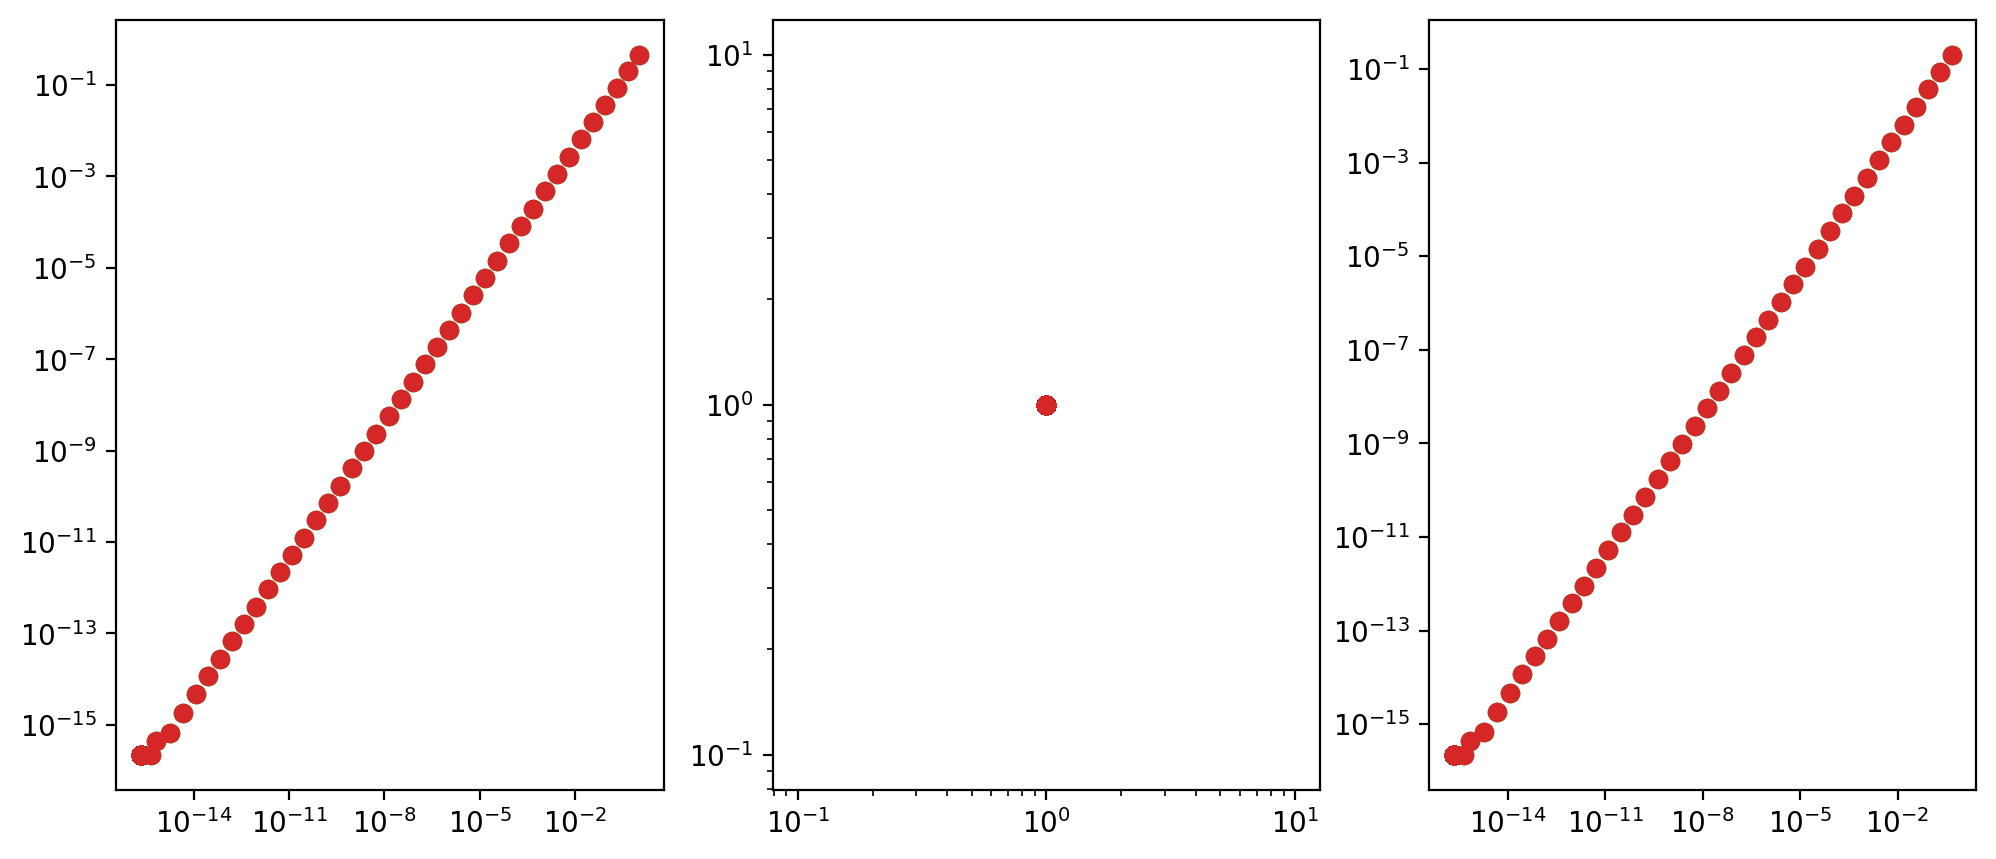

In [197]:
fig = plt.figure(figsize = (12,5))
bx = fig.subplots(1,3)

for i,fi in enumerate(f):
    x_etoile,niter,aL,bL,cL = fausse_position(f[0], a, b, tol=1e-6, itermax=500)

    bx[0].scatter(np.abs(aL[:-1]),np.abs(aL[1:]))
    bx[0].set_xscale('log')
    bx[0].set_yscale('log')
    bx[0].grid()

    bx[1].scatter(np.abs(bL[:-1]),np.abs(bL[1:]))
    bx[1].set_xscale('log')
    bx[1].set_yscale('log')
    bx[1].grid()

    bx[2].scatter(np.abs(cL[:-1]),np.abs(cL[1:]))
    bx[2].set_xscale('log')
    bx[2].set_yscale('log')
    bx[2].grid()


**Question 4** Comparaison 

> On pourra dans cette question se contenter de comparer le nombre d'itérations.
> * Pour le cas test   $\quad f(x) = e^{x} - 1 - x - 0.5x^2 \quad \text{sur} \quad  [-0.9, 1]$
> * Comparer la méthode de **dichotomie** et celle de la **fausse Position**.
> * Que remarquez-vous ?
> * Reprendre dans le cas $\quad f(x) = e^{x} - 1 - 0.5 x - 0.5x^2 \quad \text{sur} \quad  [-0.9, 1]$

## Exercice 3 (facultatif): ordre de convergence de suites, termes ajoutés par itération

**Question 1.**
> Programmer une fonction `traquer_ordre` pour calculer l'ordre de convergence d'une suite $ x_n $ vers sa limite $ l $ et tracer $|x_{n+1} - l|$ en fonction de $ |x_n - l| $ à l'echelle log-log. La fonction prend en argument
> * un ndarray `xn` contenant les éléments de la suite $ x_n $
> * un réel `lim`, la limite $ l $ de la suite
> * une chaine de caractères `title` pour le titre du graphique
>
> La fonction trace à l'echelle log-log la courbe $|x_n - l| \to |x_{n+1} - l|$ et la courbe de regression linéaire associée. 
> Elle retourne un nombre réel représentant l'ordre de convergence de la suite.

On pourra utiliser la fonction `polyfit` de `numpy` ou `linregress` de `scipy.stats`.


**Question 2**
> Tester votre algorithme en calculant, si elle converge, l'ordre de convergence de chacune des suites suivantes
  $$ u_n = (0.08)^n, \qquad v_n = (0.99)^n  \qquad  w_n  = (0.8)^{2^n}$$
 > On calculera et affichera les 30 premiers termes de ces suites. 

**Question 3** (termes ajoutés par itération)

> 1. Calculer à la main les constantes asympotiques des suites données ci-dessus
> 2. Montrer et vérifier numériquement qu'à chaque itération  
>     * avec la suite $v_n$ il faut 230 itérations pour gagner une décimale
>     * avec la suite $u_n$ on gagne une décimale à chaque itération
> 3. Combien de chiffres décimales gagne-t-on à chaque itération pour la suite $ w_n $? Vérifier numériqument.

**Question 4**

> En utilisant la fonction `traquer_ordre` et la fonction $ f = f_0 $ de l'Exercice 1, pour la méthode de dichotomie
> * estimer l'ordre de convergence des $a_n$, $b_n$ vers la racine $x^* =  0$ de $f$,
> * estimer l'ordre de convergence des longueurs des intervalles  ($|b_n - a_n|$) vers 0,
> * en utilisant un résultat du cours, estimer à l'avance le nombre d'itérations nécessaires pour obtenir le nombre de chiffres exactes donné. Comparer ce nombre à celui obtenu pendant le test.

**Question 5**
> En utilisant la fonction `traquer_ordre` et la fonction $ f = f_0 $ de l'Exercice 2, pour la méthode de fausse position
> * estimer l'ordre de convergence de la suite $a_n$ ou $b_n$ vers la racine $x^* =  0$ de $f$. 
> * en utilisant un résultat du cours, estimer à l'avance le nombre d'itérations nécessaires pour obtenir le nombre de chiffres exactes donné. Comparer ce nombre à celui obtenu pendant le test.